In [ ]:
import pandas as pd

from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file

data = [1,1,6,13,13,14,14,14,15,15,16,18,18,18,19]
pos =  [1,2,1,1,2,1,2,3,1,2,1,1,2,3,1]

  
# Create the pandas DataFrame 
elements = pd.DataFrame(data, columns = ['Valor'])
elements['Name'] = pos


palette = ["#053061", "#2166ac", "#4393c3", "#92c5de", "#d1e5f0",
           "#f7f7f7", "#fddbc7", "#f4a582", "#d6604d", "#b2182b", "#67001f"]

melting_points = elements["Valor"]
low = min(melting_points)
high = max(melting_points)
melting_point_inds = [int(10*(x-low)/(high-low)) for x in melting_points] #gives items in colors a value from 0-10
elements['melting_colors'] = [palette[i] for i in melting_point_inds]

TITLE = ""
TOOLS = "hover,pan,wheel_zoom,box_zoom,reset,save"

p = figure(tools=TOOLS, toolbar_location="above", plot_width=1200, title=TITLE)
p.toolbar.logo = "grey"
p.background_fill_color = "#dddddd"
p.xaxis.axis_label = "valor"
p.yaxis.axis_label = "frecuencia"
p.grid.grid_line_color = "white"
p.hover.tooltips = [
    ("Valor", "@Valor"),
    #("Name","@Name")
]


source = ColumnDataSource(elements)

p.circle("Valor", "Name", size=30, source=source,
         color='melting_colors', line_color="black", fill_alpha=0.8)

labels = LabelSet(x="Valor", y="Name", text="Valor", y_offset=15,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

output_file("elements.html", title="elements.py example")

show(p)

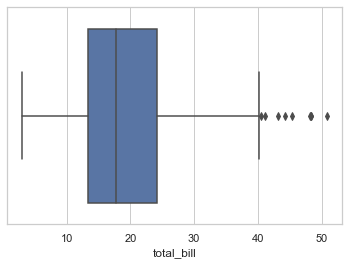

In [2]:
import seaborn as sns

sns.set(style="whitegrid")

tips = sns.load_dataset("tips")

ax = sns.boxplot(x=tips["total_bill"])

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


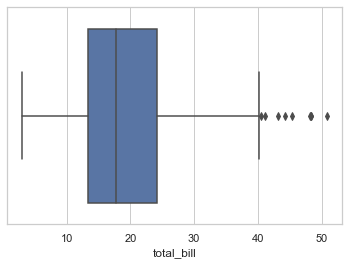